## Fraud Detection System using KNN

### Import needed libraries

In [15]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

### Build the Fraud Detector

In [16]:
class FraudDetector:
    def __init__(self, contamination=0.2):
        """Initialize the fraud detector"""
        self.model = LocalOutlierFactor(
            n_neighbors=20,
            contamination=contamination
        )
        
    def detect(self, transaction_data):
        """Detect potential fraud"""
        # -1 for anomalies (potential fraud), 1 for normal transactions
        predictions = self.model.fit_predict(transaction_data)
        
        # Get anomaly scores
        scores = -self.model.negative_outlier_factor_
        
        return predictions, scores
        
    def analyze_findings(self, transaction_data, predictions, scores):
        """Analyze detected anomalies"""
        fraud_indices = np.where(predictions == -1)[0]
        
        results = []
        for idx in fraud_indices:
            results.append({
                'transaction_id': idx,
                'data': transaction_data[idx],
                'fraud_score': scores[idx]
            })
            
        return sorted(results, key=lambda x: x['fraud_score'], 
                     reverse=True)

### Test and Evaluate the model

In [17]:
# Example: Detecting Credit Card Fraud
# Features: [amount, time, location, etc.]
transactions = np.array([
    [100, 10, 1],    # Normal transaction
    [150, 12, 1],    # Normal transaction
    [5000, 2, 3],    # Potential fraud
])

detector = FraudDetector()
predictions, scores = detector.detect(transactions)
fraud_cases = detector.analyze_findings(transactions, predictions, scores)

print("Potential fraud cases:")
for case in fraud_cases:
    print(f"Transaction {case['transaction_id']}: Score {case['fraud_score']:.2f}")

Potential fraud cases:
Transaction 1: Score 1.01


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_lof.py:283: UserWarning: n_neighbors (20) is greater than the total number of samples (3). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


### test the model using expanded data

In [18]:
# expanded dataset:
transactions = np.array([
    [100, 10, 1],
    [150, 12, 1],
    [80, 15, 2],
    [90, 18, 2],
    [200, 9, 3],
    [5000, 2, 3],
    [4700, 3, 3],
    [30, 50, 5],
    [40, 52, 5],
    [10000, 1, 8],
    [20, 60, 1],
    [25, 61, 1],
    [6000, 4, 9],
    [70, 20, 2],
    [80, 21, 2],
])

detector = FraudDetector()
predictions, scores = detector.detect(transactions)
fraud_cases = detector.analyze_findings(transactions, predictions, scores)

print("Potential fraud cases:")
for case in fraud_cases:
    print(f"Transaction {case['transaction_id']}: Score {case['fraud_score']:.2f}")

Potential fraud cases:
Transaction 5: Score 1.03
Transaction 6: Score 1.03
Transaction 12: Score 1.03


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_lof.py:283: UserWarning: n_neighbors (20) is greater than the total number of samples (15). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


### Scatter Plot that shows Transactions

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_lof.py:283: UserWarning: n_neighbors (20) is greater than the total number of samples (15). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


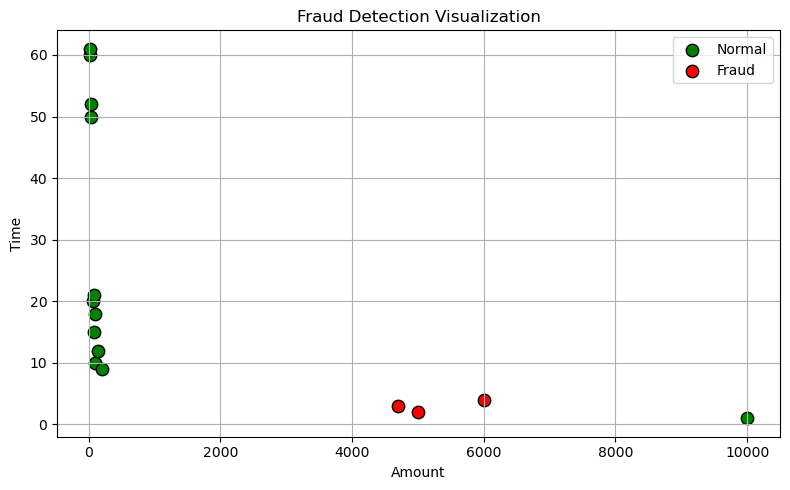

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Detect frauds
predictions, scores = detector.detect(transactions)

# Convert predictions to labels
is_fraud = predictions == -1

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(transactions[~is_fraud, 0], transactions[~is_fraud, 1],
            c='green', label='Normal', edgecolor='k', s=80)
plt.scatter(transactions[is_fraud, 0], transactions[is_fraud, 1],
            c='red', label='Fraud', edgecolor='k', s=80)

plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Fraud Detection Visualization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
